# **KENAR TESPİTİ, KÖŞE TESPİTİ, HAARCASCADE YÜZ TESPİTİ**
# Gerekli Kütüphaneler

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Canny Kenar Tespiti

(-0.5, 699.5, 536.5, -0.5)

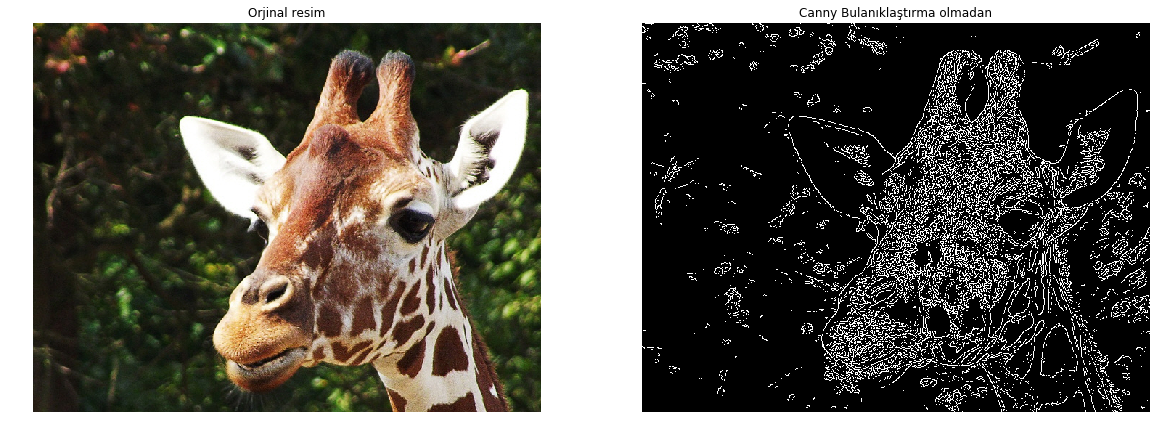

In [17]:
img = cv2.imread('zurafa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Canny detection without blurring
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.title('Orjinal resim')
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(edges, cmap='gray')
plt.title('Canny Bulanıklaştırma olmadan')
plt.axis('off')

# Ben sadece iki eşik değeri için medyan değerini bulanıklaştırmadan kullandım ve sonuç çok da istenmiyor. Şimdi bu sefer farklı eşik değerleri deneyelim.

In [3]:
# Set the lower and upper threshold
med_val = np.median(img)
lower = int(max(0, .7*med_val))
upper = int(min(255, 1.3*med_val))

# Farklı kernel boyutlarına göre Canny Kenar Tespiti

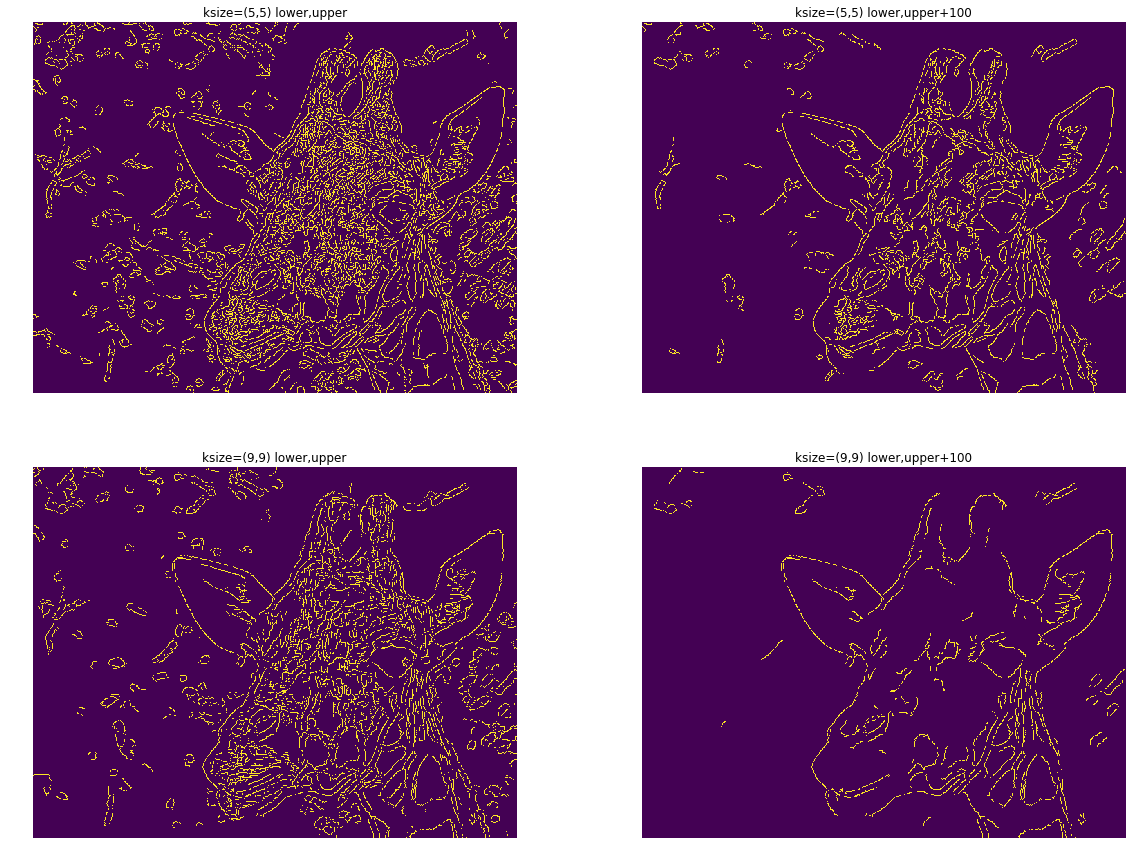

In [4]:
# Blurring with ksize = 5 
img_k5 = cv2.blur(img, ksize = (5, 5))
# Canny detection with different thresholds
edges_k5 = cv2.Canny(img_k5, threshold1 = lower, threshold2 = upper)
edges_k5_2 = cv2.Canny(img_k5, lower, upper+100)
# Blurring with ksize = 9 
img_k9 = cv2.blur(img, ksize = (9, 9))
# Canny detection with different thresholds
edges_k9 = cv2.Canny(img_k9, lower, upper)
edges_k9_2 = cv2.Canny(img_k9, lower, upper+100)
# Plot the images
images = [edges_k5, edges_k5_2, edges_k9, edges_k9_2]
labels=['ksize=(5,5) lower,upper',
        'ksize=(5,5) lower,upper+100',
        'ksize=(9,9) lower,upper',
        'ksize=(9,9) lower,upper+100']
plt.figure(figsize = (20, 15))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')
plt.show()

# Yukarıda gördüğünüz gibi, bulanıklaştırma gürültüleri gidermeye yardımcı oluyor ve çekirdeğin (9x9) büyüklüğünde daha iyi sonuç aldık. Ayrıca, daha yüksek üst eşik değeri ile daha iyi bir sonuç aldık.

# **Köşe Tespiti**
## Köşe algılama, nesne algılama, hareket algılama, video izleme ve benzeri alanlarda yaygın olarak kullanılan başka bir algılama algoritmasıdır. Görüntü işlemede köşe nedir? Pikselli bir köşeyi nasıl tanımlayabiliriz? Köşeyi, kenarların kesiştiği bir kavşak olarak görüyoruz. O zaman onları nasıl bulabiliriz? Önce tüm kenarları bulmak ve sonra birbirlerini geçtikleri noktaları bulmak? Aslında, Harris köşe tespiti ve Shi & Tomasi köşe tespiti gibi işleri daha verimli hale getirmenin başka bir yolu var .

## Bu algoritmalar aşağıdaki gibi çalışır. Yoğunluk değerlerinde her yöne önemli bir değişiklik olduğu noktaları tespit ediyoruz. Ve sonra ondan özdeğerleri çıkarmak için bir matris oluştururuz. Bu özdeğerler, bir köşe olup olmadığına karar vermek için puanlama puanları adınadır. Matematiksel ifadeler aşağıda gösterilmiştir.

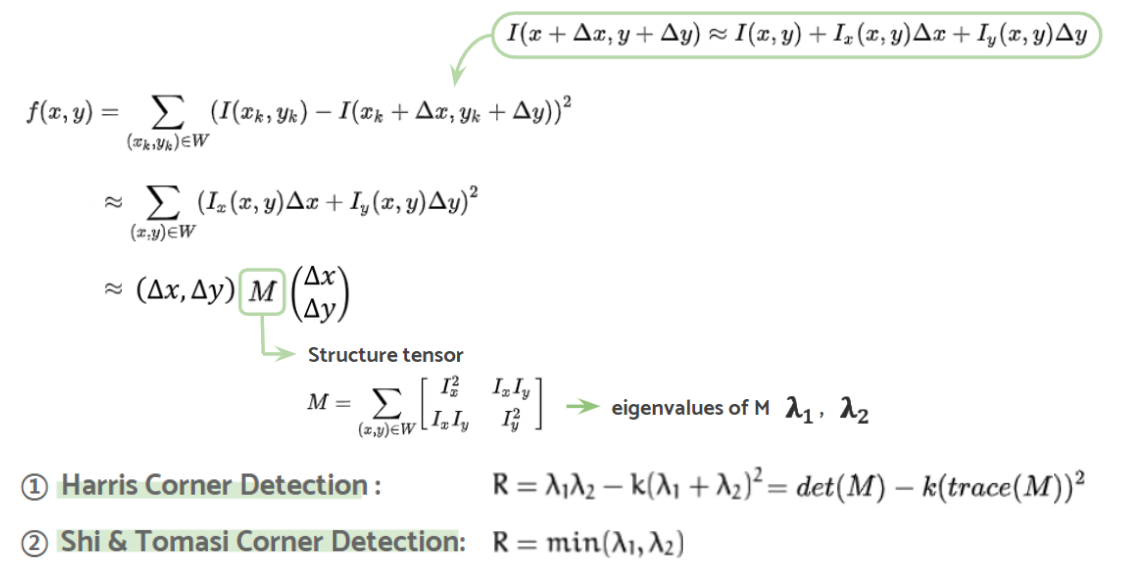

In [18]:
from IPython.display import Image
Image(filename='formul.png') 

# Harris Köşe Tespiti

In [5]:
img = cv2.imread('masa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# Apply Harris corner detection
dst = cv2.cornerHarris(img_gray, blockSize = 2, ksize = 3, k = .04)

(-0.5, 1049.5, 699.5, -0.5)

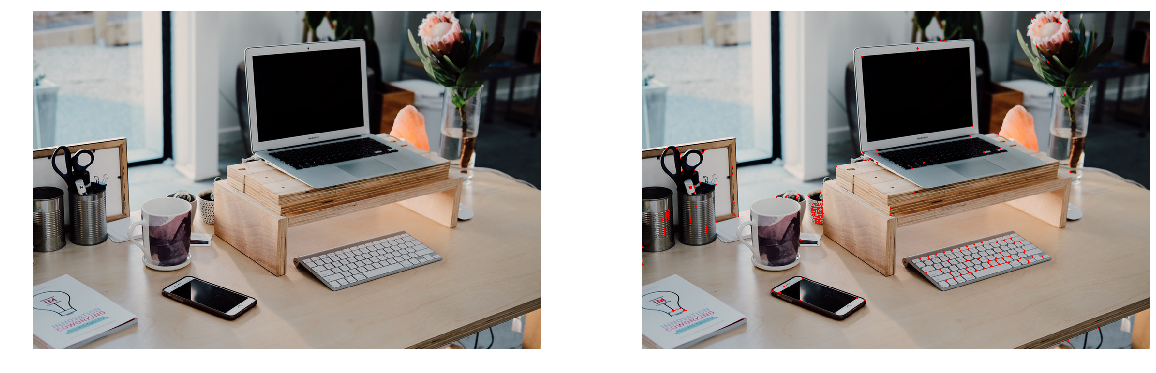

In [6]:
# Spot the detected corners
img_2 = img.copy()
img_2[dst>0.01*dst.max()]=[255,0,0]
# Plot the image
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_2)
plt.axis('off')

# Shi-Tomasi Köşe Tespiti

(-0.5, 1049.5, 699.5, -0.5)

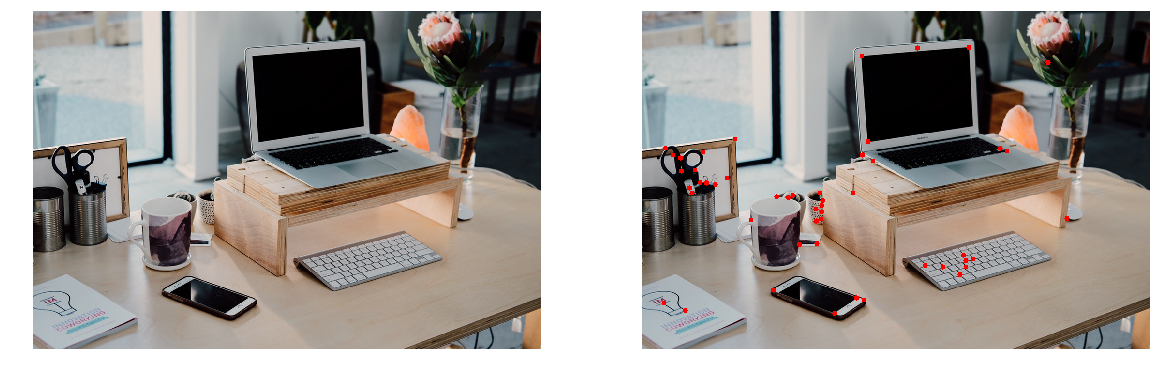

In [7]:
# Apply Shi-Tomasi corner detection
corners = cv2.goodFeaturesToTrack(img_gray, maxCorners = 50, 
                                  qualityLevel = 0.01, 
                                  minDistance = 10)
corners = np.int0(corners)
# Spot the detected corners
img_2 = img.copy()
for i in corners:
    x,y = i.ravel()
    cv2.circle(img_2, center = (x, y), 
               radius = 5, color = 255, thickness = -1)
# Plot the image
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_2)
plt.axis('off')

# **Yüz Tanıma**
# HaarCascade

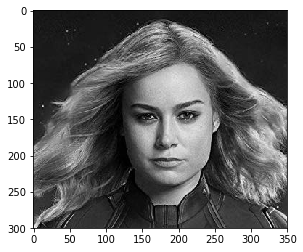

In [8]:
cap_mavl = cv2.imread('captin_marvel.jpg')
# Find the region of interest
roi = cap_mavl[50:350, 200:550]
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
plt.imshow(roi, cmap = 'gray')

In [9]:
# Load Cascade filter 
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

(-0.5, 349.5, 299.5, -0.5)

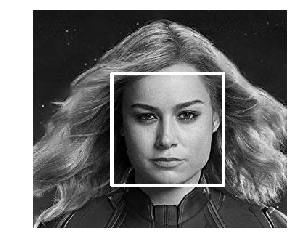

In [11]:
# Create the face detecting function 
def detect_face(img):
    
    img_2 = img.copy()
    face_rects = face_cascade.detectMultiScale(img_2, 
                                               scaleFactor = 1.1,
                                               minNeighbors = 3)
    
    for (x, y, w, h) in face_rects:
        cv2.rectangle(img_2, (x, y), (x+w, y+h), (255, 255, 255), 3)
        
    return img_2
# Detect the face
roi_detected = detect_face(roi)
plt.imshow(roi_detected, cmap = 'gray')
plt.axis('off')

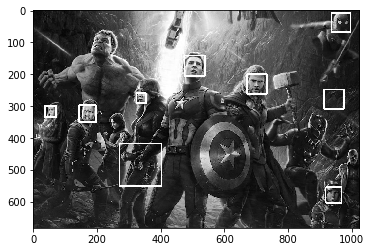

In [13]:
# Load the image file and convert the color mode
avengers = cv2.imread('avengers.jpg')
avengers = cv2.cvtColor(avengers, cv2.COLOR_BGR2GRAY)
# Detect the face and plot the result
detected_avengers = detect_face(avengers)
plt.imshow(detected_avengers, cmap = 'gray')

# OpenCV ile kendi videomuzda yüz tespiti yapalım